# Title: Term Project Data Preparation
### Author: Sanjay Jaras

## Import Libraries

In [3]:
from datetime import datetime

import Levenshtein as lv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yaml

%matplotlib inline
from IPython.display import set_matplotlib_formats

from test_match_helpers import websiteutils as wu
from test_match_helpers import yamlutils as yu
from test_match_helpers import ziputils as zp
from test_match_helpers import web_profile_id_utis as wuapi
from test_match_helpers import pid_api_utils as apiu
from test_match_helpers import profile_api_utils as papiu


"""
The above modules in test_match_helpers are written to load yaml file into dataframe
"""

# test_match_helpers: module for classes that used in converting per match yaml files to consolidated data frame

'\nThe above modules in test_match_helpers are written to load yaml file into dataframe\n'

## Configurations 

In [4]:
set_matplotlib_formats("png", "pdf")
plt.style.use(    "seaborn-darkgrid"
)  # fivethirtyeight,ggplot,seaborn-darkgrid,seaborn-whitegrid
plt.rcParams["figure.figsize"] = [24, 12]

## Test Reading Yaml file

In [5]:
yamlIn = open("291352.yaml", "r")
yamlFile = yaml.load(yamlIn, Loader=yaml.FullLoader)
tempDf = yu.readYamlToDataFrame(1, yamlFile)
tempDf.head()
# tempGroupByInnings = tempDf.groupby(by=["MatchId", "InningNo"])
# tempTeamsTotalRuns = tempGroupByInnings["TotalRuns"].sum()

,MatchId,Date,City,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,...,BattingTeam,Opener1,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns
0,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.1,PA Jaques,RP Singh,ML Hayden,0,0,0
1,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.2,PA Jaques,RP Singh,ML Hayden,0,0,0
2,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.3,PA Jaques,RP Singh,ML Hayden,0,0,0
3,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.4,PA Jaques,RP Singh,ML Hayden,0,0,0
4,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.5,PA Jaques,RP Singh,ML Hayden,0,0,0


## Extract Zip file to yaml file and convert yaml data into data frame
### Please find ziputils, yamlutils and testmatches classes modules from test_match_helpers folder

In [6]:
df = zp.extractZipAndProcess("tests.zip", 50)
df.head()

Done processing in 43.957164790001116 seconds


,MatchId,Date,City,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,...,BattingTeam,Opener1,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns
0,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.1,PA Jaques,RP Singh,ML Hayden,0,0,0
1,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.2,PA Jaques,RP Singh,ML Hayden,0,0,0
2,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.3,PA Jaques,RP Singh,ML Hayden,0,0,0
3,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.4,PA Jaques,RP Singh,ML Hayden,0,0,0
4,1,2008-01-02,NaN,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,...,Australia,PA Jaques,ML Hayden,0.5,PA Jaques,RP Singh,ML Hayden,0,0,0


In [7]:
df.shape

(100503, 23)

## Convert Data frame to csv for future reference
Read 5 lines from CSV

In [8]:
df.to_csv("all-records.csv", index=False)
count = 0
with open("all-records.csv") as f:
    line = f.readline()
    while line != "":
        count += 1
        print(line, end="")
        if count > 5:
            break
        print(f.readline())

MatchId,Date,City,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,WonByRuns,WonByWickets,InningNo,BattingTeam,Opener1,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns
1,2008-01-02,,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,122,0,1,Australia,PA Jaques,ML Hayden,0.1,PA Jaques,RP Singh,ML Hayden,0,0,0

MatchId,Date,City,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,WonByRuns,WonByWickets,InningNo,BattingTeam,Opener1,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns
1,2008-01-02,,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,122,0,1,Australia,PA Jaques,ML Hayden,0.2,PA Jaques,RP Singh,ML Hayden,0,0,0

MatchId,Date,City,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,WonByRuns,WonByWickets,InningNo,BattingTeam,Opener1,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns
1,2008-01-02,,Sydney Cricket Ground,Australia,India,Australia,b

## Check for Values in City column

In [9]:
df.City.unique()

array([nan, 'Cape Town', 'Dunedin', 'Durban', 'Wellington', 'Perth',
       'Mirpur', 'Hamilton', 'Guyana', 'Napier', 'Chennai', 'Ahmedabad',
       'Trinidad', 'Kanpur', 'London', 'Jamaica', 'Manchester', 'Antigua',
       'Nottingham', 'Barbados', 'Leeds', 'Colombo', 'Birmingham',
       'Bangalore', 'Chandigarh', 'Delhi', 'Nagpur', 'Bloemfontein',
       'Brisbane', 'Centurion', 'Karachi'], dtype=object)

In [10]:
any(df.City.isna())

True

### City column contains NaN values so let's drop this column

In [11]:
df.drop(labels=["City"], axis=1, inplace=True)
df.head()

,MatchId,Date,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,WonByRuns,...,BattingTeam,Opener1,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns
0,1,2008-01-02,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,122,...,Australia,PA Jaques,ML Hayden,0.1,PA Jaques,RP Singh,ML Hayden,0,0,0
1,1,2008-01-02,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,122,...,Australia,PA Jaques,ML Hayden,0.2,PA Jaques,RP Singh,ML Hayden,0,0,0
2,1,2008-01-02,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,122,...,Australia,PA Jaques,ML Hayden,0.3,PA Jaques,RP Singh,ML Hayden,0,0,0
3,1,2008-01-02,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,122,...,Australia,PA Jaques,ML Hayden,0.4,PA Jaques,RP Singh,ML Hayden,0,0,0
4,1,2008-01-02,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,122,...,Australia,PA Jaques,ML Hayden,0.5,PA Jaques,RP Singh,ML Hayden,0,0,0


### Add columns for boundries

In [12]:
df["Fours"] = df["RunsBat"] == 4
df["Sixes"] = df["RunsBat"] == 6

### Check for duplicates

In [13]:
duplicates = df[df.duplicated(["MatchId", "InningNo", "BallNo"], keep=False)]
duplicates.head()

,MatchId,Date,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,WonByRuns,...,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns,Fours,Sixes
9686,6,2008-01-16,Western Australia Cricket Association Ground,Australia,India,India,bat,IK Pathan,India,72,...,V Sehwag,6.1,W Jaffer,B Lee,V Sehwag,1,1,2,False,False
9695,6,2008-01-16,Western Australia Cricket Association Ground,Australia,India,India,bat,IK Pathan,India,72,...,V Sehwag,6.1,W Jaffer,B Lee,V Sehwag,0,0,0,False,False
9715,6,2008-01-16,Western Australia Cricket Association Ground,Australia,India,India,bat,IK Pathan,India,72,...,V Sehwag,10.1,V Sehwag,SW Tait,IK Pathan,1,0,1,False,False
9724,6,2008-01-16,Western Australia Cricket Association Ground,Australia,India,India,bat,IK Pathan,India,72,...,V Sehwag,10.1,IK Pathan,SW Tait,V Sehwag,0,0,0,False,False


In [14]:
print(f"We found {len(duplicates)/2} records duplicated.")

We found 2.0 records duplicated.


## Drop Duplcates

In [15]:
df.drop_duplicates(["MatchId", "InningNo", "BallNo"], keep="first", inplace=True)
duplicates = df[df.duplicated(["MatchId", "InningNo", "BallNo"], keep=False)]
duplicates.head()

,MatchId,Date,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,WonByRuns,...,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns,Fours,Sixes


Now there are no duplicates

In [16]:
matchinfo = df.groupby(by=["MatchId"])
dfMatchInfo = matchinfo.head(n=1)
dfMatchInfo.shape

(50, 24)

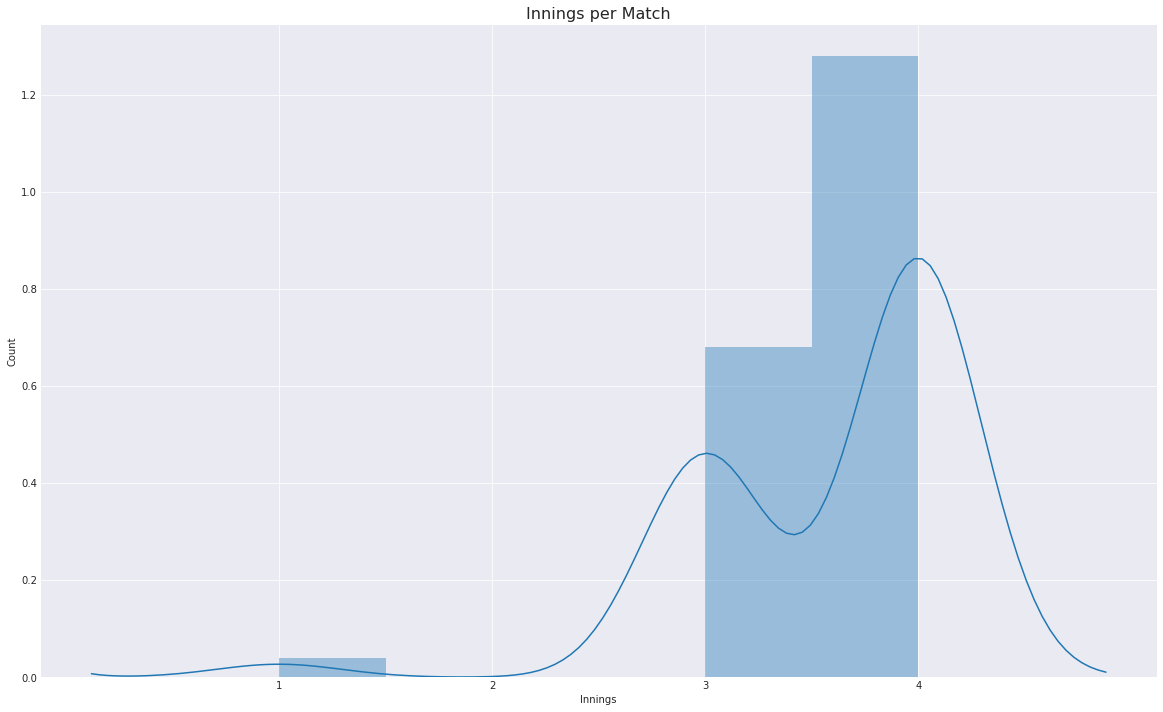

In [17]:
inningsPerMatch = matchinfo.agg({"InningNo": "max"})

plt.figure(figsize=(20, 12))
g = sns.distplot(inningsPerMatch.InningNo)
g.set(xlabel="Innings", ylabel="Count")
g.axes.set_title("Innings per Match", fontsize=16)
g.set_xticks(range(1, 5, 1))

### Matches with inning 1 & 2 are outliers as we say there are not completed matches, so we can remove them

## Drop outliers

In [18]:
df.dropna(inplace=True)

inningsPerMatch = inningsPerMatch[inningsPerMatch.InningNo < 3]

df.drop(df[df.MatchId.isin(inningsPerMatch)], errors="ignore", inplace=True)

In [19]:
df.shape

(100491, 24)

In [20]:
groupByInnings = df.groupby(by=["MatchId", "InningNo"])
teamsTotalRuns = groupByInnings["TotalRuns"].sum()
boundriesPerInnings = groupByInnings["Fours"].sum() + groupByInnings["Sixes"].sum()

In [21]:
df.MatchId.unique()
test = df[df.MatchId == 47]

## Conduct Fuzzy Matching
### Do fuzzy matching to check problems Team names

In [22]:
distance_to_check = 2

teams = np.concatenate((df.Team1.unique(), df.Team2.unique()))
teams = pd.Series(teams)
teams = teams.unique()
df_dist = pd.DataFrame()
for team in teams:
    dist = []
    for target in teams:
        d = lv.distance(team, target)
        dist.append(d)
        if d > 0 and d <= distance_to_check:
            print(f"Close Match found for Team Names:{team} and {target}")
    df_dist[team] = dist

In [23]:
df_dist

,Australia,South Africa,New Zealand,Bangladesh,West Indies,India,England,Sri Lanka,Pakistan
0,0,9,9,9,8,7,8,7,8
1,9,0,12,12,9,10,12,9,12
2,9,12,0,10,10,10,7,9,9
3,9,12,10,0,9,8,6,9,9
4,8,9,10,9,0,7,9,10,10
5,7,10,10,8,7,0,5,8,6
6,8,12,7,6,9,5,0,7,7
7,7,9,9,9,10,8,7,0,7
8,8,12,9,9,10,6,7,7,0


[Text(0, 0.5, 'Australia'),
 Text(0, 1.5, 'South Africa'),
 Text(0, 2.5, 'New Zealand'),
 Text(0, 3.5, 'Bangladesh'),
 Text(0, 4.5, 'West Indies'),
 Text(0, 5.5, 'India'),
 Text(0, 6.5, 'England'),
 Text(0, 7.5, 'Sri Lanka'),
 Text(0, 8.5, 'Pakistan')]

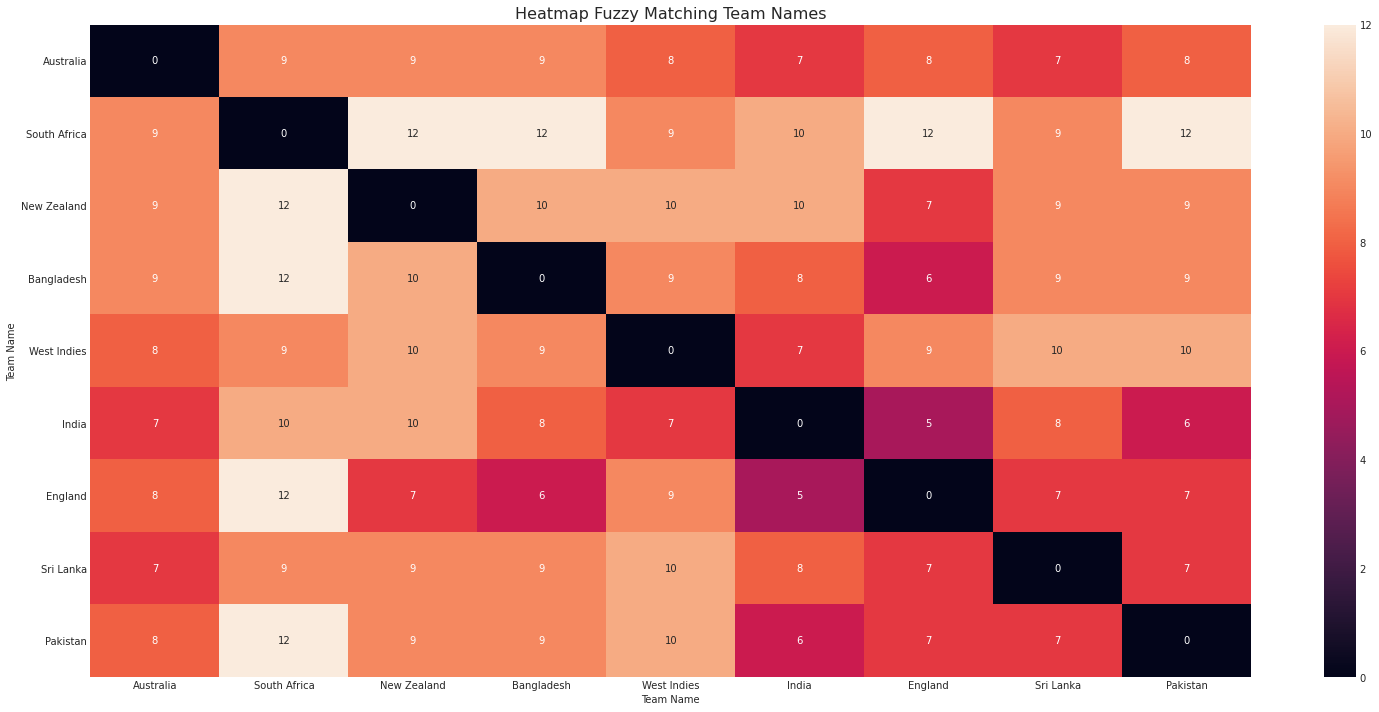

In [24]:
plt.figure(figsize=(26, 12))
g = sns.heatmap(df_dist, annot=True)
g.set(xlabel="Team Name", ylabel="Team Name")
g.axes.set_title("Heatmap Fuzzy Matching Team Names", fontsize=16)
g.set_yticklabels(teams, rotation=0)

### Do fuzzy matching to check problems Player names

In [25]:
distance_to_check = 2

players = np.concatenate((df.Batsman.unique(), df.Bowler.unique()))
players = pd.Series(players)
players = players.unique()
df_players = pd.DataFrame()
for player in players:
    playerCol = []
    for target in players:
        d = lv.distance(player, target)
        playerCol.append(d)
        if d > 0 and d <= distance_to_check:
            print(f"Close Match found for Player Names:{player} and {target}")
    df_players[player] = playerCol
# df_dist.values[[np.arange(df_dist.shape[0])] * 2] = 99

Close Match found for Player Names:GC Smith and DS Smith
Close Match found for Player Names:MD Bell and IR Bell
Close Match found for Player Names:JS Patel and PA Patel
Close Match found for Player Names:IR Bell and MD Bell
Close Match found for Player Names:DS Smith and GC Smith
Close Match found for Player Names:PA Patel and JS Patel


These player names seems close however all are valid names. So nothing to correct

In [26]:
df_players

,PA Jaques,ML Hayden,RT Ponting,MEK Hussey,MJ Clarke,A Symonds,AC Gilchrist,GB Hogg,B Lee,MG Johnson,...,Shoaib Malik,Misbah-ul-Haq,Faisal Iqbal,Kamran Akmal,Yasir Arafat,RS Bopara,SM Pollock,Umar Gul,Sohail Khan,Danish Kaneria
0,0,6,9,8,7,7,10,8,7,8,...,11,11,10,11,11,8,9,8,11,12
1,6,0,8,6,6,8,11,7,7,7,...,11,11,11,11,11,8,9,9,10,12
2,9,8,0,10,9,9,10,7,9,7,...,12,13,12,11,12,7,7,10,11,12
3,8,6,10,0,8,10,12,8,8,8,...,12,11,12,12,11,9,10,9,11,13
4,7,6,9,8,0,9,9,8,7,8,...,11,11,11,11,10,7,8,9,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,8,8,7,9,7,8,10,7,8,8,...,11,12,11,11,10,0,8,9,10,11
172,9,9,7,10,8,9,10,8,9,8,...,10,12,11,12,12,8,0,10,9,13
173,8,9,10,9,9,9,11,8,7,10,...,9,11,9,8,10,9,10,0,9,13
174,11,10,11,11,10,11,10,10,10,10,...,8,11,9,10,10,10,9,9,0,11


## Cleaning/Formatting Website Data 

In [64]:
df_bat_ws = pd.DataFrame()
df_bow_ws = pd.DataFrame()
df_fow_ws = pd.DataFrame()
first_match_summary = None
for i in range(len(dfMatchInfo)):
    matchInfo = dfMatchInfo.iloc[i, :]
    dt = datetime.strptime(matchInfo["Date"], "%Y-%m-%d")
    first_match_summary = wu.get_match_summary(
        dt, matchInfo["Team1"], matchInfo["Team2"]
    )
    batting, bowling, fows = wu.get_scorecard(first_match_summary[2])
    df_batting = pd.DataFrame(
        batting,
        columns=[
            "Innings",
            "Batsman",
            "Dismissal",
            "Runs",
            "Balls",
            "4s",
            "6s",
            "SR",
            "PercOfTotal",
        ],
    )
    df_batting["MatchId"] = matchInfo["MatchId"]
    df_bowling = pd.DataFrame(
        bowling,
        columns=[
            "Innings",
            "Bowler",
            "Overs",
            "Middens",
            "Runs",
            "Wickets",
            "ER",
            "PercOfWickets",
        ],
    )
    df_bowling["MatchId"] = matchInfo["MatchId"]
    df_bat_ws = df_bat_ws.append(df_batting)
    df_bow_ws = df_bow_ws.append(df_bowling)
    maxwkts = 0
    for fow in fows:
        if maxwkts < len(fow):
            maxwkts=  len(fow)
    
    columns = ["Innings"]
    for j in range(1, maxwkts):
        columns.append("Wkt"+str(j))
    
    df_fow = pd.DataFrame(fows, columns=columns)
    df_fow["MatchId"] = dfMatchInfo.iloc[i, 0]
    df_fow_ws = df_fow_ws.append(df_fow)

Error occured for Match url: http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard.asp?MatchCode=1899 list index out of range
Error occured for Match url: http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard.asp?MatchCode=1909 list index out of range
Error occured for Match url: http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard.asp?MatchCode=1925 list index out of range


In [60]:
dfMatchInfo

,MatchId,Date,Venue,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,WonByRuns,...,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns,Fours,Sixes
0,1,2008-01-02,Sydney Cricket Ground,Australia,India,Australia,bat,A Symonds,Australia,122,...,ML Hayden,0.1,PA Jaques,RP Singh,ML Hayden,0,0,0,False,False
2607,2,2008-01-02,Newlands,South Africa,West Indies,West Indies,bat,AG Prince,South Africa,0,...,D Ganga,0.1,CH Gayle,DW Steyn,D Ganga,0,0,0,False,False
4707,3,2008-01-04,University Oval,New Zealand,Bangladesh,New Zealand,field,JDP Oram,New Zealand,0,...,Junaid Siddique,0.1,Tamim Iqbal,CS Martin,Junaid Siddique,0,0,0,False,False
6096,4,2008-01-10,Kingsmead,South Africa,West Indies,South Africa,field,AG Prince,South Africa,100,...,BA Parchment,0.1,D Ganga,DW Steyn,BA Parchment,1,0,1,False,False
7546,5,2008-01-12,Basin Reserve,New Zealand,Bangladesh,New Zealand,field,DL Vettori,New Zealand,137,...,Junaid Siddique,0.1,Tamim Iqbal,CS Martin,Junaid Siddique,0,0,0,False,False
8741,6,2008-01-16,Western Australia Cricket Association Ground,Australia,India,India,bat,IK Pathan,India,72,...,V Sehwag,0.1,W Jaffer,B Lee,V Sehwag,1,0,1,False,False
10682,7,2008-01-24,Adelaide Oval,Australia,India,India,bat,SR Tendulkar,draw,0,...,IK Pathan,0.1,V Sehwag,B Lee,IK Pathan,2,0,2,False,False
13264,8,2008-02-22,Shere Bangla National Stadium,Bangladesh,South Africa,Bangladesh,bat,JH Kallis,South Africa,0,...,Junaid Siddique,0.1,Tamim Iqbal,DW Steyn,Junaid Siddique,0,0,0,False,False
14815,9,2008-02-29,Chittagong Divisional Stadium,Bangladesh,South Africa,South Africa,bat,GC Smith,South Africa,205,...,GC Smith,0.1,ND McKenzie,Mashrafe Mortaza,GC Smith,0,0,0,False,False
16464,10,2008-03-05,Seddon Park,New Zealand,England,New Zealand,bat,DL Vettori,New Zealand,189,...,MD Bell,0.1,JM How,RJ Sidebottom,MD Bell,0,0,0,False,False


In [28]:
df_bat_ws.head()
df_bat_ws[df_bat_ws.MatchId==12]


,Innings,Batsman,Dismissal,Runs,Balls,4s,6s,SR,PercOfTotal,MatchId
0,1,M G Vandort,lbw b Taylor,52,117,8,0,44.44,10.92%,12
1,1,B S M Warnapura,c †Ramdin b Bravo,120,226,14,0,53.10,25.21%,12
2,1,K C Sangakkara,c Smith b Taylor,50,114,3,0,43.86,10.50%,12
3,1,D P M D Jayawardene*,lbw b Gayle,136,234,13,0,58.12,28.57%,12
4,1,T T Samaraweera,c sub b Taylor,0,2,0,0,0.00,,12
5,1,T M Dilshan,lbw b Taylor,20,39,4,0,51.28,4.20%,12
6,1,H A P W Jayawardene†,b Powell,21,83,2,0,25.30,4.41%,12
7,1,W P U J C Vaas,not out,54,142,4,0,38.03,11.34%,12
8,1,T Thushara,c sub b Gayle,0,9,0,0,0.00,,12
9,1,H M R K B Herath,not out,13,8,3,0,162.50,2.73%,12


In [27]:
df_bow_ws.head()

,Innings,Bowler,Overs,Middens,Runs,Wickets,ER,PercOfWickets,MatchId
0,1,R P Singh,26.0,3,124,4,4.77,40.00%,1
1,1,I Sharma,23.0,3,87,0,3.78,,1
2,1,S C Ganguly,6.0,1,13,0,2.17,,1
3,1,Harbhajan Singh,27.0,3,108,2,4.00,20.00%,1
4,1,A Kumble,25.3,0,106,4,4.16,40.00%,1


### Fill blank values with appropriate values For Batsman Stats

In [28]:
df_bat_ws["Dismissal"].replace("", "not out", inplace=True)
for col in ["Runs", "Balls", "4s", "6s", "SR", "PercOfTotal"]:
    df_bat_ws[col].replace("", 0, inplace=True)

In [29]:
df_bat_ws["PercOfTotal"] = (
    df_bat_ws["PercOfTotal"].astype("str").apply(lambda x: x.replace("%", ""))
)

### Fill blank values with appropriate values For Bowler Stats

In [30]:
df_bow_ws["PercOfWickets"] = (
    df_bow_ws["PercOfWickets"].astype("str").apply(lambda x: x.replace("%", ""))
)
df_bow_ws["PercOfWickets"].replace("", "0", inplace=True)

In [31]:
dup = df_bat_ws.duplicated(["MatchId", "Innings", "Batsman"]).sum()
print(f"There are {dup} duplicate records")

There are 0 duplicate records


### Find duplicates for Bowler Stas

In [32]:
dup = df_bow_ws.duplicated(["MatchId", "Innings", "Bowler"]).sum()
print(f"There are {dup} duplicate records")

There are 0 duplicate records


### Replace * and † from Batsman And Dismissal columns

In [33]:
df_bat_ws["Batsman"] = df_bat_ws["Batsman"].apply(lambda x: x.replace("*", ""))
df_bat_ws["Batsman"] = df_bat_ws["Batsman"].apply(lambda x: x.replace("†", ""))
df_bat_ws["Dismissal"] = df_bat_ws["Dismissal"].apply(lambda x: x.replace("†", ""))

### Find closest matching player names with Fuzzy matching

#### find all player names from Datset downloaded

In [34]:
player_dataset = df.Batsman.unique()
player_website = set(df_bat_ws.Batsman.unique()).union(df_bow_ws.Bowler.unique())

In [35]:
player_not_matched = {}
for player in player_dataset:
    mini = 99
    closest_match = ""
    for target in player_website:
        dist = lv.distance(player.upper(), target.upper())
        if dist < mini:
            mini = dist
            closest_match = target
        if mini == 0:
            break
    if mini > 0:
        player_not_matched[closest_match] = player

In [36]:
player_not_matched

{'P A Jaques': 'PA Jaques',
 'M L Hayden': 'ML Hayden',
 'R T Ponting': 'RT Ponting',
 'M E K Hussey': 'MEK Hussey',
 'M J Clarke': 'MJ Clarke',
 'A C Gilchrist': 'AC Gilchrist',
 'G B Hogg': 'GB Hogg',
 'M G Johnson': 'MG Johnson',
 'S R Clark': 'SR Clark',
 'V V S Laxman': 'VVS Laxman',
 'S R Tendulkar': 'SR Tendulkar',
 'S C Ganguly': 'SC Ganguly',
 'M S Dhoni': 'MS Dhoni',
 'R P Singh': 'RP Singh',
 'C H Gayle': 'CH Gayle',
 'R S Morton': 'RS Morton',
 'M N Samuels': 'MN Samuels',
 'D J J Bravo': 'DJ Bravo',
 'R N Lewis': 'RN Lewis',
 'J E Taylor': 'JE Taylor',
 'D B Powell': 'DBL Powell',
 'F H Edwards': 'FH Edwards',
 'G C Smith': 'GC Smith',
 'N D McKenzie': 'ND McKenzie',
 'H M Amla': 'HM Amla',
 'J H Kallis': 'JH Kallis',
 'A G Prince': 'AG Prince',
 'A B de Villiers': 'AB de Villiers',
 'M V Boucher': 'MV Boucher',
 'P L Harris': 'PL Harris',
 'D W Steyn': 'DW Steyn',
 'Enamul Haque': 'Enamul Haque jnr',
 'Sajidul Islam': 'Sajedul Islam',
 'C D Cumming': 'CD Cumming',
 'M D B

In [37]:
def replace_player_name(x):
    if x in player_not_matched:
        return player_not_matched[x]
    else:
        return x


def replace_player_name_in_dismissal(x):
    for key,    value in player_not_matched.items():
        if key in x:
            x = x.replace(key, value)
    return x


def get_dismissed_by_bowler(x):
    if " b " in x:
        splts = x.split(" b ")
        return splts[-1].strip()
    elif x.startswith("b "):
        splts = x.split("b ")
        return splts[-1].strip()
    return ""

In [38]:
df_bat_ws["Batsman"] = df_bat_ws["Batsman"].apply(lambda x: replace_player_name(x))
df_bow_ws["Bowler"] = df_bow_ws["Bowler"].apply(lambda x: replace_player_name(x))
df_bat_ws["Dismissal"] = df_bat_ws["Dismissal"].apply(
    lambda x: replace_player_name_in_dismissal(x)
)

### Correct Batsman Name

In [39]:
df_bat_ws.head()
df_bat_ws.Batsman.str.replace("SM Warnapura", "BSM Warnapura")

0         PA Jaques
1         ML Hayden
2        RT Ponting
3        MEK Hussey
4         MJ Clarke
          ...      
28       TR Ambrose
29        SCJ Broad
30      JM Anderson
31         GP Swann
32    RJ Sidebottom
Name: Batsman, Length: 1892, dtype: object

In [40]:
df_bow_ws.head()

,Innings,Bowler,Overs,Middens,Runs,Wickets,ER,PercOfWickets,MatchId
0,1,RP Singh,26.0,3,124,4,4.77,40.00,1
1,1,I Sharma,23.0,3,87,0,3.78,0,1
2,1,SC Ganguly,6.0,1,13,0,2.17,0,1
3,1,Harbhajan Singh,27.0,3,108,2,4.00,20.00,1
4,1,A Kumble,25.3,0,106,4,4.16,40.00,1


### Find bowler name from Dismissal column

In [41]:
df_bat_ws["Bowler"] = df_bat_ws["Dismissal"].apply(lambda x: get_dismissed_by_bowler(x))

In [42]:
df_bat_ws.head()

,Innings,Batsman,Dismissal,Runs,Balls,4s,6s,SR,PercOfTotal,MatchId,Bowler
0,1,PA Jaques,c Dhoni b RP Singh,0,9,0,0,0.00,0,1,RP Singh
1,1,ML Hayden,c Tendulkar b RP Singh,13,26,2,0,50.00,2.81,1,RP Singh
2,1,RT Ponting,lbw b Harbhajan Singh,55,69,9,0,79.71,11.88,1,Harbhajan Singh
3,1,MEK Hussey,c Tendulkar b RP Singh,41,79,3,0,51.90,8.86,1,RP Singh
4,1,MJ Clarke,lbw b Harbhajan Singh,1,4,0,0,25.00,0.22,1,Harbhajan Singh


In [45]:
player_website = set(df_bat_ws.Batsman.unique()).union(df_bow_ws.Bowler.unique())

## API Datasets

### Get Profile-Ids By using API
#### 1. Tried to find player by exact match first
#### 2. If not found in above step, searched with last-name
#### 3. Used Fuzzy Matching for name matching if not found with exact match
#### 4. Helper Modules
        1. pid_api_utils
        2. profile_api_utils
        3. web_profile_id_utis

In [55]:
import requests
import json


def get_base_url():
    with open("test_match_helpers/apikey.json") as f:
        keys = json.load(f)
        apikey = keys["cricapi_key"]
    return "http://cricapi.com/api/playerFinder?apikey=" + apikey + "&name="


def get_profile_ids(player_name):
    resp = requests.get(get_base_url() + player_name)
    if resp.status_code != 200:
        print("Error in getting Player profile Id...", resp.status_code)
        return None
    else:
        players = []
        for player in resp.json()["data"]:
            players.append([player["name"], player["pid"], player["fullName"]])
        print(players)
    return players


def find_closest_short_name(player, profiles):
    names = player.split()
    for target_player in profiles:
        if player.upper() == target_player[0]:
            return target_player

        target_names = target_player[2].split()
        match = False
        if names[-1] == target_names[-1]:  # last name matches
            match = True
            for i in range(len(names[0])):
                if not target_names[i].startswith(names[0][i]):
                    match = False
                    break
        if match:
            return target_player
    return None


def find_closest_fuzzy_match(player, profiles):
    mini = 999
    closest_match = ""
    for target_player in profiles:
        dist = lv.distance(player.upper(), target_player[2].upper())
        if dist < mini:
            mini = dist
            closest_match = target_player
        if mini == 0:
            break
    return closest_match


def find_Profile_id(player, profiles):
    if len(profiles) == 1:
        return profiles[0]
    else:  # got multiple profiles
        profile = find_closest_short_name(player, profiles)
        if profile is None:
            profile = find_closest_fuzzy_match(player, profiles)
    return profile


def get_profile_id(player):
    pids = get_profile_ids(player)
    if len(pids) != 1:
        names = player.split()
        pids = get_profile_ids(names[-1])
        profile = find_Profile_id(player, pids)
    else:
        profile = pids[0]
    return profile

In [56]:
df_player_profiles = pd.DataFrame(columns=["PlayerName", "Profile-Id"])
i = 0
for player in player_website:
    #print(player)
    df_player_profiles = df_player_profiles.append(
        {"PlayerName": player, "Profile-Id": get_profile_id(player)[1]},
        ignore_index=True,
    )
df_player_profiles.to_csv("Player-Profile.csv", index = False)

[['Les Botham', 4271, 'Leslie John Botham'], ['Johan Botha', 44149, 'Johan Botha']]
[['Les Botham', 4271, 'Leslie John Botham'], ['Sir Ian Botham', 9163, 'Ian Terence Botham'], ['Andre Botha', 44102, 'Andre Cornelius Botha'], ['Johan Botha', 44149, 'Johan Botha'], ['Patrick Botha', 381033, 'Patrick Botha'], ['Eben Botha', 595956, 'Eben Botha'], ['Niel Botha', 596386, 'Niel Botha'], ['Eben Botha', 1070638, 'Eben Botha'], ['Neil Botham', 1070969, 'Neil Botham'], ['Devon Botha', 1072587, 'Devon Botha'], ['Amanda Higginbotham', 1098014, 'Amanda Higginbotham'], ['Bianca Botha', 1125119, 'Bianca Botha'], ['Keenan Botha', 1204018, 'Keenan Botha']]
[]
[['Jean-Paul Duminy', 44932, 'Jean-Paul Duminy']]
[['Morne Morkel', 46538, 'Morne Morkel']]
[]
[['Thomas Armstrong', 4038, 'Thomas Goldsmith Armstrong'], ['Chuck Fleetwood-Smith', 5327, "Leslie O'Brien Fleetwood-Smith"], ['Steve Smith', 7656, 'Steven Barry Smith'], ['Ben Smith', 20227, 'Benjamin Francis Smith'], ['Will Smith', 21229, 'William Rew

### As API has limit on Daily requests(100 Request/Day), written this backup approach with web-scrapping for Profile-Ids

In [57]:
df_player_profiles = pd.DataFrame(columns=["PlayerName", "Profile-Id"])
for player in player_website:
    print(player)
    df_player_profiles = df_player_profiles.append(
        {"PlayerName": player, "Profile-Id": wuapi.get_profile_id(player)[1]},
        ignore_index=True,
    )
df_player_profiles.to_csv("Player-Profile.csv", index = False)

J Botha
JP Duminy
M Morkel
GC Smith
MS Dhoni
ND McKenzie
PD Collingwood
MG Johnson
R Dravid
MS Sinclair
PA Patel
NT Paranavitana
D Ramdin
Faisal Iqbal
SP Fleming
S Chattergoon
SCJ Broad
Khurram Manzoor
Yasir Arafat
RO Hinds
DE Bollinger
D Ganga
WPUJC Vaas
JM How
MJ Prior
B Casson
MG Vandort
KD Karthik
HMRKB Herath
Imrul Kayes
CK Kapugedera
PM Siddle
MS Panesar
V Sehwag
NM Hauritz
Shahriar Nafees
Shahadat Hossain
AJ Strauss
JD Ryder
JE Taylor
Mashrafe Mortaza
CD Cumming
Mushfiqur Rahim
Abdur Razzak
A Kumble
LPC Silva
AB McDonald
FH Edwards
M Vijay
Mehrab Hossain jnr
IE O'Brien
MD Bell
Shoaib Malik
IK Pathan
TG Southee
DR Flynn
DPMD Jayawardene
Mohammad Ashraful
JJ Krejza
MEK Hussey
GP Swann
GB Hogg
RP Singh
BB McCullum
S Chanderpaul
AJ Redmond
Salman Butt
A Nel
Sohail Khan
Naeem Islam
SR Clark
JAH Marshall
Raqibul Hasan
BP Nash
PL Harris
D Kaneria
Z Khan
HAPW Jayawardene
Junaid Siddique
DJG Sammy
S M Pollock
RR Sarwan
Mahbubul Alam
RN Lewis
DJ Bravo
Habibul Bashar
T Thushara
SCG MacGill

### Read Profile-Ids from file

In [58]:
df_player_profiles = pd.read_csv("Player-Profile.csv")


### Correct Profile-Ids as API has some issues with Search functionality

In [63]:
players_need_update = {"Aftab Ahmed":56266, "Junaid Siddique":55946, "CL White":8291, "Yasir Arafat":43654, "DPMD Jayawardene":49289, "SM Warnapura":50874, "Naeem Islam":56054, "Shahadat Hossain":56149 ,"Sohail Khan":317252}
for key, val in players_need_update.items():
    df_player_profiles.at[df_player_profiles[df_player_profiles.PlayerName==key].index[0], "Profile-Id"] = val    

In [66]:
import requests
import pandas as pd
import json


def get_base_url():
    with open("test_match_helpers/apikey.json") as f:
        keys = json.load(f)
        apikey = keys["cricapi_key"]
    return "http://cricapi.com/api/playerStats?apikey=" + apikey + "&pid="


def parse_json(json):
    batting = {}
    bowling = {}
    if (
        "data" in json
        and "batting" in json["data"]
        and "tests" in json["data"]["batting"]
    ):
        batting = json["data"]["batting"]["tests"]
    if (
        "data" in json
        and "bowling" in json["data"]
        and "tests" in json["data"]["bowling"]
    ):
        bowling = json["data"]["bowling"]["tests"]
    return batting, bowling


def get_profile(pid):

    resp = requests.get(get_base_url() + pid)
    if resp.status_code != 200:
        print("Error in getting Player profile Id...", resp.status_code)
        return {}, {}
    else:
        return parse_json(resp.json())


# batting, bowling = get_profile("55882")
# print(batting)
# print(bowling)

# json = {'pid': 35320, 'profile': "\n\nSachin Tendulkar has been the most complete batsman of his time, the most prolific runmaker of all time, and arguably the biggest cricket icon the game has ever known. His batting was based on the purest principles: perfect balance, economy of movement, precision in stroke-making, and that intangible quality given only to geniuses - anticipation. If he didn't have a signature stroke - the upright, back-foot punch comes close - it's because he was equally proficient at each of the full range of orthodox shots (and plenty of improvised ones as well) and can pull them out at will.  \n\n", 'imageURL': 'https://www.cricapi.com/playerpic/35320.jpg', 'battingStyle': 'Right-hand bat', 'bowlingStyle': 'Right-arm offbreak, Legbreak googly', 'majorTeams': 'India,Asia XI,Mumbai,Mumbai Indians,Yorkshire', 'currentAge': '44 years 186 days', 'born': 'April 24, 1973, Bombay (now Mumbai), Maharashtra', 'fullName': 'Sachin Ramesh Tendulkar', 'name': 'Sachin Tendulkar', 'country': 'India', 'playingRole': 'Top-order batsman', 'v': '2', 'data': {'bowling': {'listA': {'10': '0', '5w': '2', '4w': '4', 'SR': '50.8', 'Econ': '4.97', 'Ave': '42.17', 'BBM': '5/32', 'BBI': '5/32', 'Wkts': '201', 'Runs': '8478', 'Balls': '10230', 'Inns': '', 'Mat': '551'}, 'firstClass': {'10': '0', '5w': '0', '4w': '', 'SR': '107.1', 'Econ': '3.45', 'Ave': '61.74', 'BBM': '', 'BBI': '3/10', 'Wkts': '71', 'Runs': '4384', 'Balls': '7605', 'Inns': '', 'Mat': '310'}, 'T20Is': {'10': '0', '5w': '0', '4w': '0', 'SR': '15.0', 'Econ': '4.80', 'Ave': '12.00', 'BBM': '1/12', 'BBI': '1/12', 'Wkts': '1', 'Runs': '12', 'Balls': '15', 'Inns': '1', 'Mat': '1'}, 'ODIs': {'10': '0', '5w': '2', '4w': '4', 'SR': '52.2', 'Econ': '5.10', 'Ave': '44.48', 'BBM': '5/32', 'BBI': '5/32', 'Wkts': '154', 'Runs': '6850', 'Balls': '8054', 'Inns': '270', 'Mat': '463'}, 'tests': {'10': '0', '5w': '0', '4w': '0', 'SR': '92.1', 'Econ': '3.52', 'Ave': '54.17', 'BBM': '3/14', 'BBI': '3/10', 'Wkts': '46', 'Runs': '2492', 'Balls': '4240', 'Inns': '145', 'Mat': '200'}}, 'batting': {'listA': {'50': '114', '100': '60', 'St': '0', 'Ct': '175', '6s': '', '4s': '', 'SR': '', 'BF': '', 'Ave': '45.54', 'HS': '200*', 'Runs': '21999', 'NO': '55', 'Inns': '538', 'Mat': '551'}, 'firstClass': {'50': '116', '100': '81', 'St': '0', 'Ct': '186', '6s': '', '4s': '', 'SR': '', 'BF': '', 'Ave': '57.84', 'HS': '248*', 'Runs': '25396', 'NO': '51', 'Inns': '490', 'Mat': '310'}, 'T20Is': {'50': '0', '100': '0', 'St': '0', 'Ct': '1', '6s': '0', '4s': '2', 'SR': '83.33', 'BF': '12', 'Ave': '10.00', 'HS': '10', 'Runs': '10', 'NO': '0', 'Inns': '1', 'Mat': '1'}, 'ODIs': {'50': '96', '100': '49', 'St': '0', 'Ct': '140', '6s': '195', '4s': '2016', 'SR': '86.23', 'BF': '21367', 'Ave': '44.83', 'HS': '200*', 'Runs': '18426', 'NO': '41', 'Inns': '452', 'Mat': '463'}, 'tests': {'50': '68', '100': '51', 'St': '0', 'Ct': '115', '6s': '69', '4s': '', 'SR': '', 'BF': '', 'Ave': '53.78', 'HS': '248*', 'Runs': '15921', 'NO': '33', 'Inns': '329', 'Mat': '200'}}}, 'ttl': 2, 'provider': {'source': 'Various', 'url': 'https://cricapi.com/', 'pubDate': '2020-07-19T14:50:59.730Z'}, 'creditsLeft': 250}
# batting, bowling = parse_json(json)
# df_profile_bat = pd.DataFrame()
# df_profile_bat=df_profile_bat.append(batting, ignore_index=True)
# df_profile_bowl = pd.DataFrame()
# df_profile_bowl=df_profile_bowl.append(bowling, ignore_index=True)
# print(df_profile_bat)
# print(df_profile_bowl)



### Read Profile with Statastics from API

In [67]:
from test_match_helpers import profile_api_utils as papiu
df_profile_bat = pd.DataFrame()
df_profile_bowl = pd.DataFrame()
for pid in df_player_profiles["Profile-Id"]:
    batting, bowling = get_profile(str(pid))
    batting["Profile-Id"] = pid
    bowling["Profile-Id"] = pid
    df_profile_bat=df_profile_bat.append(batting, ignore_index=True)
    df_profile_bowl=df_profile_bowl.append(bowling, ignore_index=True)

df_profile_bat.to_csv("Player-Profile-Bat.csv", index = False)
df_profile_bowl.to_csv("Player-Profile-Bowl.csv", index = False)

### Read Profile Stats from Files

In [68]:
df_profile_bat = pd.read_csv("Player-Profile-Bat.csv")
df_profile_bowl = pd.read_csv("Player-Profile-Bowl.csv")

### Batting Stats

In [69]:
df_profile_bat.head()

,100,4s,50,6s,Ave,BF,Ct,HS,Inns,Mat,NO,Profile-Id,Runs,SR,St
0,0,9.0,0,0,20.75,238.0,3,25,6,5,2,44149.0,83,34.87,0
1,6,250.0,8,13,32.85,4544.0,38,166,74,46,10,44932.0,2103,46.28,0
2,0,137.0,0,4,12.35,1764.0,21,40,93,79,20,46538.0,902,51.13,0
3,27,1165.0,38,24,48.25,15525.0,169,277,205,117,13,47270.0,9265,59.67,0
4,6,544.0,33,78,38.09,8249.0,256,224,144,90,16,28081.0,4876,59.11,38


### Bowling Stats

In [70]:
df_profile_bowl.head()

,10,4w,5w,Ave,BBI,BBM,Balls,Econ,Inns,Mat,Profile-Id,Runs,SR,Wkts
0,0,1,0,33.70,4/56,7/102,1017,3.38,10,5,44149.0,573,59.8,17
1,0,2,0,38.11,4/47,4/51,2703,3.55,57,46,44932.0,1601,64.3,42
2,0,16,6,28.85,6/23,8/196,15275,3.12,146,79,46538.0,7963,55.3,276
3,0,0,0,110.62,2/145,2/145,1418,3.74,37,117,47270.0,885,177.2,8
4,0,0,0,-,-,-,96,4.18,7,90,28081.0,67,-,0


### Rename Columns names Before merging

In [71]:
df_profile_bat.columns = "bat_" + df_profile_bat.columns.values
df_profile_bowl.columns = "bowl_" + df_profile_bowl.columns.values

### Join profile-Ids, batting, and bowling sataframe into one dataframe by using key as Profile-Id

In [72]:
df_profiles_all = pd.merge(df_player_profiles, df_profile_bat, how="outer", left_on="Profile-Id", right_on="bat_Profile-Id")
df_profiles_all = pd.merge(df_profiles_all, df_profile_bowl, how="outer", left_on="Profile-Id", right_on="bowl_Profile-Id")

### Drop duplicate columns

In [73]:
df_profiles_all.drop(columns=["bat_Profile-Id", "bowl_Profile-Id"], inplace=True)

### Replace "-" with pd.np.nan, Intentionally keeping it as NaN to indcate the stats is not applicable for that player

In [75]:
df_profiles_all = df_profiles_all.apply(lambda x: x.replace("-", np.nan))

### Missing Values

In [76]:
df_profiles_all[df_profiles_all.bat_BF.isna()]

,PlayerName,Profile-Id,bat_100,bat_4s,bat_50,bat_6s,bat_Ave,bat_BF,bat_Ct,bat_HS,...,bowl_Ave,bowl_BBI,bowl_BBM,bowl_Balls,bowl_Econ,bowl_Inns,bowl_Mat,bowl_Runs,bowl_SR,bowl_Wkts
50,IE O'Brien,5327,0,NaN,0,1,9.00,NaN,0,16*,...,37.38,6/110,10/239,3093,3.04,18,10,1570,73.6,42
149,SR Tendulkar,35320,51,NaN,68,69,53.78,NaN,115,248*,...,54.17,3/10,3/14,4240,3.52,145,200,2492,92.1,46


### Find invalid records or records with all missing values
 

In [77]:
df_profiles_all[df_profiles_all.bat_HS.isna()]

,PlayerName,Profile-Id,bat_100,bat_4s,bat_50,bat_6s,bat_Ave,bat_BF,bat_Ct,bat_HS,...,bowl_Ave,bowl_BBI,bowl_BBM,bowl_Balls,bowl_Econ,bowl_Inns,bowl_Mat,bowl_Runs,bowl_SR,bowl_Wkts


### Histogram for batting averages to find outliers

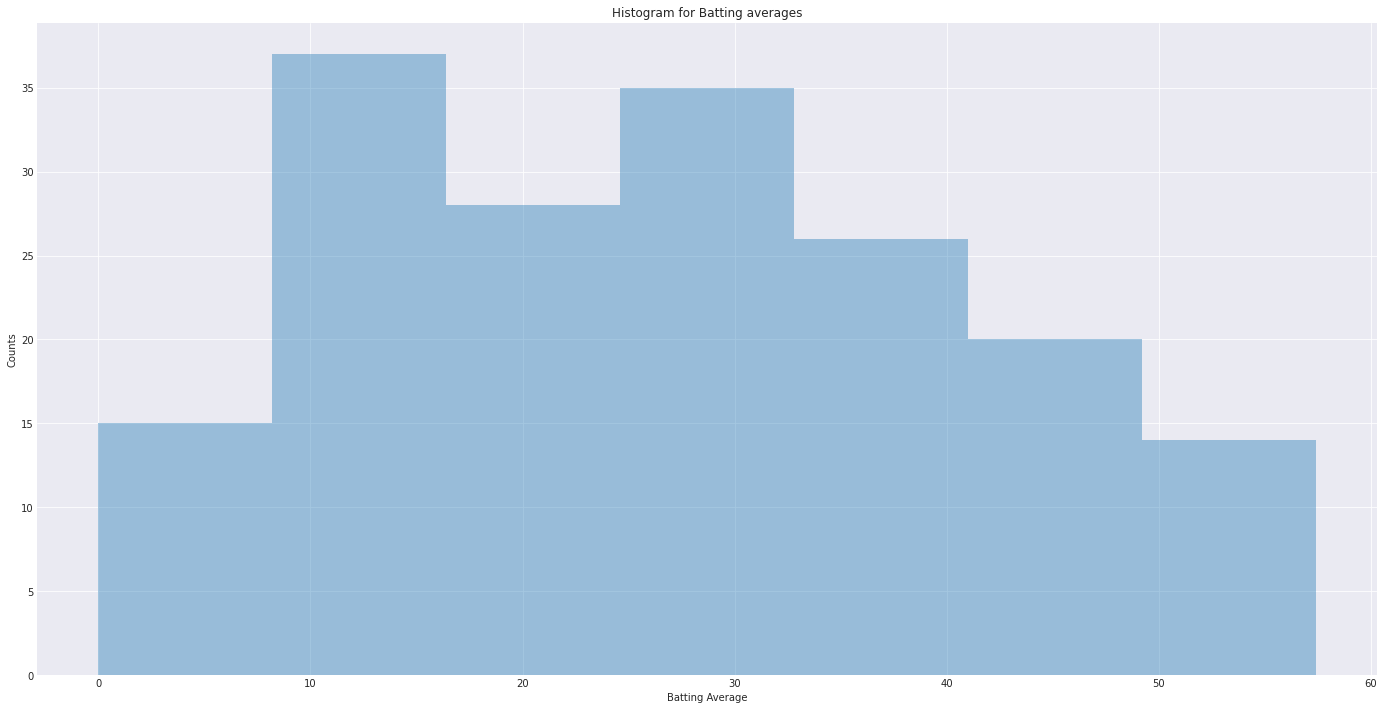

In [78]:
ax = sns.distplot(df_profiles_all.bat_Ave, kde=False)
ax.set(xlabel="Batting Average", ylabel="Counts", title="Histogram for Batting averages")
plt.show()

### Histogram for bowling strike rates to find outliers

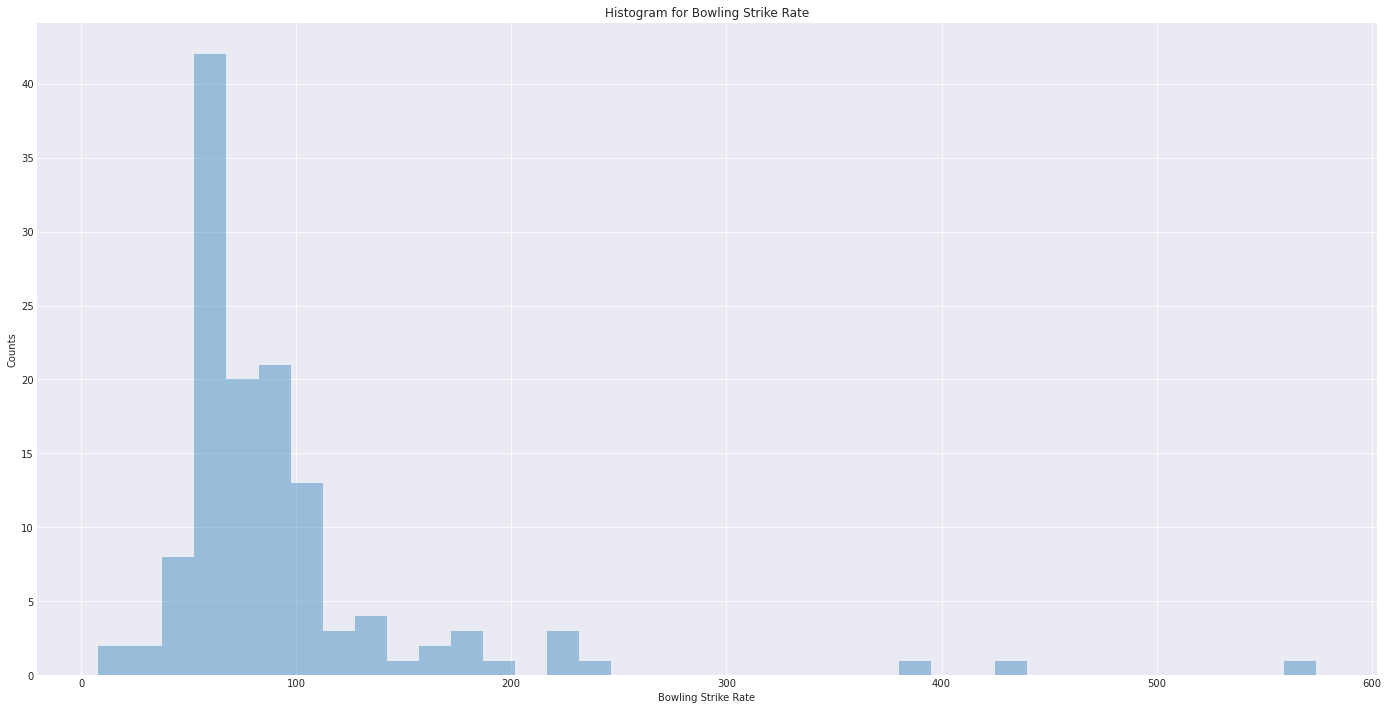

In [79]:
ax = sns.distplot(df_profiles_all.bowl_SR, kde=False)
ax.set(xlabel="Bowling Strike Rate", ylabel="Counts", title="Histogram for Bowling Strike Rate")
plt.show()

In [80]:
df_profiles_all[df_profiles_all.bowl_SR.astype(float) < 15]

,PlayerName,Profile-Id,bat_100,bat_4s,bat_50,bat_6s,bat_Ave,bat_BF,bat_Ct,bat_HS,...,bowl_Ave,bowl_BBI,bowl_BBM,bowl_Balls,bowl_Econ,bowl_Inns,bowl_Mat,bowl_Runs,bowl_SR,bowl_Wkts
88,MV Boucher,44111,5,656.0,35,20,30.30,11005.0,532,125,...,6.00,1/6,1/6,8,4.50,1,147,6,8.0,1


As this bowler "Mark Boucher" only bowled 8 balls, this stats is valid 

### Find Duplicates

In [81]:
df_profiles_all.duplicated().value_counts()

False    176
dtype: int64

In [84]:
df_profile_bowl.to_csv("Milestone-5/api-bowl-profiles.csv", index=False)


In [65]:
df_fow_ws.to_csv("Milestone-5/ws-fows.csv", index=False)